# Lectura de archivos csv

In [20]:
import pandas as pd

In [21]:
ciudades_df = pd.read_csv('cities.csv')
ciudades_df.head(5)

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [22]:
ciudades_df.shape

(128, 10)

In [23]:
satelites_df = pd.read_csv(
    'observing-details.txt',
    sep='\t',
    index_col='satellite',
)
satelites_df.head(5)

,date[UT],RA[hh:mm:ss],DEC[dd:mm:ss]
satellite,,,
ONEWEB-0500-ID-0429,2022-09-12 09:13:00,00:00:03.39,-18:58:42.16
ONEWEB-0519-ID-0448,2022-09-12 09:15:00,23:09:05.64,-39:27:02.86
ONEWEB-0148-ID-0126,2022-09-12 09:17:00,01:40:09.69,-36:29:47.50
ONEWEB-0163-ID-0128,2022-09-12 09:17:00,01:01:08.84,-59:07:21.23
ONEWEB-0167-ID-0131,2022-09-12 09:17:00,02:16:35.43,+25:17:21.60


In [24]:
ciudades_df.columns

Index(['LatD', ' "LatM"', ' "LatS"', ' "NS"', ' "LonD"', ' "LonM"', ' "LonS"',
       ' "EW"', ' "City"', ' "State"'],
      dtype='object')

In [25]:
# actualizar el nombre de las columnas a camelCase y borrar espacios y comillas dobles

ciudades_df.columns = [nombre.replace(' ', '').replace('"', '') for nombre in ciudades_df.columns]
ciudades_df.columns = [nombre.lower() for nombre in ciudades_df.columns]

In [26]:
ciudades_df.columns

Index(['latd', 'latm', 'lats', 'ns', 'lond', 'lonm', 'lons', 'ew', 'city',
       'state'],
      dtype='object')

In [27]:
ciudades_df['city']

0            "Youngstown"
1               "Yankton"
2                "Yakima"
3             "Worcester"
4       "Wisconsin Dells"
              ...        
123                "Reno"
124              "Regina"
125           "Red Bluff"
126             "Reading"
127             "Ravenna"
Name: city, Length: 128, dtype: object

In [28]:
ciudades_df.city

0            "Youngstown"
1               "Yankton"
2                "Yakima"
3             "Worcester"
4       "Wisconsin Dells"
              ...        
123                "Reno"
124              "Regina"
125           "Red Bluff"
126             "Reading"
127             "Ravenna"
Name: city, Length: 128, dtype: object

In [29]:
ciudades_df.to_csv('formateados_ciudades.csv', index=False)

In [30]:
ciudades_df

,latd,latm,lats,ns,lond,lonm,lons,ew,city,state
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV
124,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA
125,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA
126,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA


In [31]:
ciudades_df.lond

0       80
1       97
2      120
3       71
4       89
      ... 
123    119
124    104
125    122
126     75
127     81
Name: lond, Length: 128, dtype: int64

In [32]:
ciudades_df['smilling'] = (ciudades_df.lond.to_numpy() + ciudades_df.latd.to_numpy())/ciudades_df.lonm.to_numpy()

/tmp/ipykernel_25656/678453371.py:1: RuntimeWarning: divide by zero encountered in true_divide
  ciudades_df['smilling'] = (ciudades_df.lond.to_numpy() + ciudades_df.latd.to_numpy())/ciudades_df.lonm.to_numpy()


In [33]:
ciudades_df['smilling'].describe()

count    128.000000
mean            inf
std             NaN
min        1.982759
25%        3.240572
50%        5.144231
75%        9.131222
max             inf
Name: smilling, dtype: float64

<AxesSubplot:xlabel='latd', ylabel='lond'>

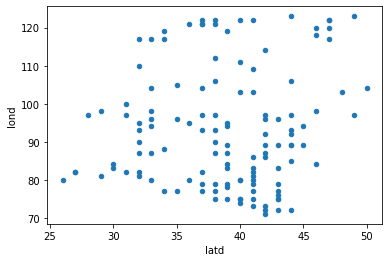

In [34]:
# scatter plot de latitud vs longitud con metodo de pandas

ciudades_df.plot.scatter(x='latd', y='lond')

In [35]:
ciudades_df.lond.iloc[10:20]

10    103
11     77
12     82
13     98
14     97
15     80
16     80
17    120
18    122
19     82
Name: lond, dtype: int64

In [36]:
ciudades_df.lonm.describe()

count    128.000000
mean      27.742188
std       16.927937
min        0.000000
25%       14.000000
50%       26.500000
75%       40.250000
max       58.000000
Name: lonm, dtype: float64

In [37]:
mascara_longitud = ciudades_df.lonm < 20
ciudades_df.loc[mascara_longitud, ['city', 'lonm']].head(5)

,city,lonm
5,"""Winston-Salem""",15
6,"""Winnipeg""",9
7,"""Winchester""",9
11,"""Williamsport""",0
12,"""Williamson""",16


In [38]:
lista = ciudades_df.lonm.to_numpy()
lista[:5]

array([39, 23, 30, 48, 46])

In [39]:
juegos2_df = pd.read_csv('videojuegos2.csv')
juegos2_df.head(5)

,"Nombre,year,Consola,Calificacion,Tags(separados por",),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"The Legend of Zelda,86,Famicom,Disk System,3.5...",Link,Zelda,Hyrule,Triforce
1,"Double Dragon,87,Arcade,3.7,Beat-'em up",Billy,Jimmy,PuÃ±ete,NaN
2,"The Legend of Zelda,88,NES,4.3,RPG",Link,Zelda,Hyrule,Triforce
3,"Halo 5: Guardians,15,Xbox One,4,FPS",Master Chief,Cortana,Covenant,NaN
4,"Curse of Ra,82,Commodore PET,3,RPG",adventure,Temple,Apshai,NaN


In [40]:
with open('videojuegos2.csv', 'r') as archivo:

    lineas = archivo.readlines()

In [41]:
lineas[:5]

['"Nombre,year,Consola,Calificacion,Tags(separados por ",),,,\n',
 '"The Legend of Zelda,86,Famicom,Disk System,3.5,RPG",Link,Zelda,Hyrule,Triforce\n',
 '"Double Dragon,87,Arcade,3.7,Beat-\'em up",Billy,Jimmy,PuÃ±ete,\n',
 '"The Legend of Zelda,88,NES,4.3,RPG",Link,Zelda,Hyrule,Triforce\n',
 '"Halo 5: Guardians,15,Xbox One,4,FPS",Master Chief,Cortana,Covenant,\n']

In [42]:
from utils import random_student

In [43]:
random_student()

'Alexis Bacian'

In [44]:
for linea in lineas:

    print(linea)

    print(linea.split('"'))

"Nombre,year,Consola,Calificacion,Tags(separados por ",),,,

['', 'Nombre,year,Consola,Calificacion,Tags(separados por ', ',),,,\n']
"The Legend of Zelda,86,Famicom,Disk System,3.5,RPG",Link,Zelda,Hyrule,Triforce

['', 'The Legend of Zelda,86,Famicom,Disk System,3.5,RPG', ',Link,Zelda,Hyrule,Triforce\n']
"Double Dragon,87,Arcade,3.7,Beat-'em up",Billy,Jimmy,PuÃ±ete,

['', "Double Dragon,87,Arcade,3.7,Beat-'em up", ',Billy,Jimmy,PuÃ±ete,\n']
"The Legend of Zelda,88,NES,4.3,RPG",Link,Zelda,Hyrule,Triforce

['', 'The Legend of Zelda,88,NES,4.3,RPG', ',Link,Zelda,Hyrule,Triforce\n']
"Halo 5: Guardians,15,Xbox One,4,FPS",Master Chief,Cortana,Covenant,

['', 'Halo 5: Guardians,15,Xbox One,4,FPS', ',Master Chief,Cortana,Covenant,\n']
"Curse of Ra,82,Commodore PET,3,RPG",adventure,Temple,Apshai,

['', 'Curse of Ra,82,Commodore PET,3,RPG', ',adventure,Temple,Apshai,\n']
"Battlefield 1,16,Xbox One,4.8,FPS",WWI,,,

['', 'Battlefield 1,16,Xbox One,4.8,FPS', ',WWI,,,\n']


In [45]:
tags = []

for linea in lineas:
    
    tags.append(linea.split('"')[-1])

tags

[',),,,\n',
 ',Link,Zelda,Hyrule,Triforce\n',
 ',Billy,Jimmy,PuÃ±ete,\n',
 ',Link,Zelda,Hyrule,Triforce\n',
 ',Master Chief,Cortana,Covenant,\n',
 ',adventure,Temple,Apshai,\n',
 ',WWI,,,\n']

In [46]:
tags = [tag.strip(',') for tag in tags]
tags = [tag.strip('\n') for tag in tags]
tags[0] = 'Tag'

In [47]:
tags

['Tag',
 'Link,Zelda,Hyrule,Triforce',
 'Billy,Jimmy,PuÃ±ete,',
 'Link,Zelda,Hyrule,Triforce',
 'Master Chief,Cortana,Covenant,',
 'adventure,Temple,Apshai,',
 'WWI,,,']

In [48]:
columnas = []
for linea in lineas:

    columna = linea.split('"')[1]

    columnas.append(columna.split(','))

columnas

[['Nombre', 'year', 'Consola', 'Calificacion', 'Tags(separados por '],
 ['The Legend of Zelda', '86', 'Famicom', 'Disk System', '3.5', 'RPG'],
 ['Double Dragon', '87', 'Arcade', '3.7', "Beat-'em up"],
 ['The Legend of Zelda', '88', 'NES', '4.3', 'RPG'],
 ['Halo 5: Guardians', '15', 'Xbox One', '4', 'FPS'],
 ['Curse of Ra', '82', 'Commodore PET', '3', 'RPG'],
 ['Battlefield 1', '16', 'Xbox One', '4.8', 'FPS']]

In [49]:
for idx, columna in enumerate(columnas):

    if idx == 0:
        continue

    tag = columna[-1]
    tags[idx] = f"{tags[idx]}, {tag}"

tags

['Tag',
 'Link,Zelda,Hyrule,Triforce, RPG',
 "Billy,Jimmy,PuÃ±ete,, Beat-'em up",
 'Link,Zelda,Hyrule,Triforce, RPG',
 'Master Chief,Cortana,Covenant,, FPS',
 'adventure,Temple,Apshai,, RPG',
 'WWI,,,, FPS']

In [50]:
nombre = []
year = []
consola = []
calificacion = []

for columna in columnas:

    nombre.append(columna[0])
    year.append(columna[1])
    consola.append(columna[2])
    calificacion.append(columna[3])


In [51]:
datos = {
    'nombre': nombre[1:],
    'year': year[1:],
    'consola': consola[1:],
    'calificacion': calificacion[1:],
    'tags': tags[1:],
}

df = pd.DataFrame(datos)

In [52]:
df

,nombre,year,consola,calificacion,tags
0,The Legend of Zelda,86,Famicom,Disk System,"Link,Zelda,Hyrule,Triforce, RPG"
1,Double Dragon,87,Arcade,3.7,"Billy,Jimmy,PuÃ±ete,, Beat-'em up"
2,The Legend of Zelda,88,NES,4.3,"Link,Zelda,Hyrule,Triforce, RPG"
3,Halo 5: Guardians,15,Xbox One,4,"Master Chief,Cortana,Covenant,, FPS"
4,Curse of Ra,82,Commodore PET,3,"adventure,Temple,Apshai,, RPG"
5,Battlefield 1,16,Xbox One,4.8,"WWI,,,, FPS"


In [53]:
df.calificacion.iloc[0] = 3.5

In [57]:
df.to_csv('mucha_pega.csv', sep='\t', index=False)